<a href="https://colab.research.google.com/github/Paulina9555/029_kmeans_elbow_method/blob/main/029_kmeans_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Algorytm K-średnich](#2)
4. [WCSS - Within-Cluster-Sum-of-Squared](#3)
5. [Metoda "łaokcia" - Elbow Method](#4)
6. [Wizualizacja klastrów](#5)

### <a name='0'></a> Import bibliotek

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.3)

### <a name='1'></a> Wygenerowanie danych

In [4]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples = 1000, centers = 4, cluster_std = 1.5, center_box = (-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=950, height=500, title='Algorytm K-średnich', template='plotly_dark')

### <a name='2'></a> Algorytm K-średnich

In [6]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [8]:
#wcss

kmeans.inertia_

3963.1782089115536

In [9]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,3
1,-4.390559,-5.055149,2
2,-4.666211,-5.390080,2
3,3.022862,0.303769,1
4,3.322516,-0.676179,1


In [10]:
px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 5 klastrów', template='plotly_dark')

### <a name='3'></a> WCSS - Within-Cluster-Sum-of-Squared

In [12]:
wcss = []
for i in range (2,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

print(wcss)

[24265.86294300307, 7734.886635126091, 4282.137026938605, 3870.0514772833712, 3445.843512384326, 3227.9701890412407, 2886.230580674119, 2491.500393087208]


In [13]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns = {'index': 'clusters'})
wcss['clusters'] +=1
wcss.head()

,clusters,wcss
0,1,24265.862943
1,2,7734.886635
2,3,4282.137027
3,4,3870.051477
4,5,3445.843512


### <a name='4'></a> Metoda łokcia - Elbow Method

In [14]:
px.line(wcss, x='clusters', y='wcss', width=950, height=500, title='Within-Clusters-Sum of Squared Error (WCSS)', template = 'plotly_dark')

### <a name='5'></a> Wizualizacja klastrów

In [15]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 3 klastry', template='plotly_dark')

In [16]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centers

,c1,c2
0,-4.678306,6.633539
1,-5.302413,-5.404200
2,3.630348,1.808377


In [17]:
fig = px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 3 klastry', template='plotly_dark')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers', marker={'size':12, 'color':'LightSkyBlue', 'line':{'width':2, 'color':'tomato'}}, showlegend=False))

fig.show()

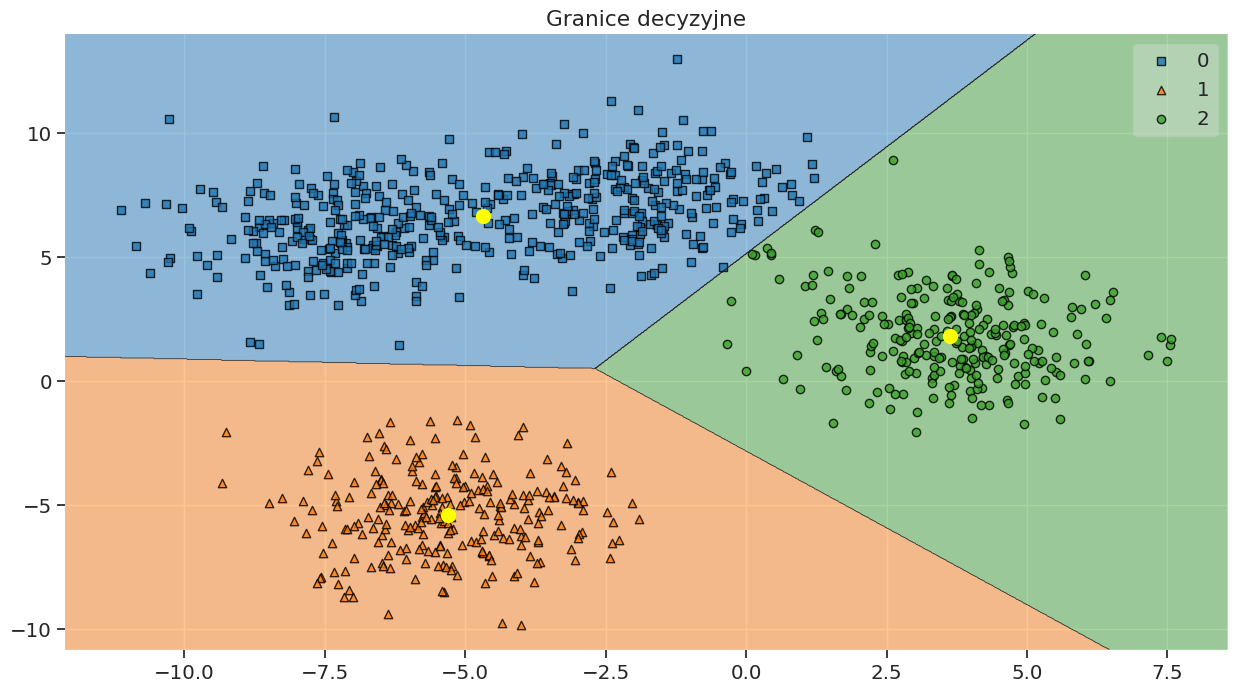

In [19]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15,8))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow')
plt.show()